In [1]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt




In [2]:
start_seeds = [0, 5 ,10, 15, 20,] #

exp0_dir = f'./full_exp/'

options_list = [
    (False, False),
    (True, False),
    (False, True),
    (True, True)
]
sharpes_all_train = {}
sharpes_all_eval = {}
sharpes_all_test = {}
best_seed_all = {}

all_R_eval = {}



for adapt_reward, adapt_state in options_list:
        sharpes_all_train[(adapt_reward, adapt_state)] = []
        sharpes_all_eval[(adapt_reward, adapt_state)] = []
        sharpes_all_test[(adapt_reward, adapt_state)] = []
        best_seed_all[(adapt_reward, adapt_state)] = []
        all_R_eval[(adapt_reward, adapt_state)] = []
        for seed_start in start_seeds:
            exp_dir = exp0_dir + f'{seed_start=}/'
            log_dir=os.path.join(exp_dir, f'log_{adapt_reward=}_{adapt_state=}')
            tensorboard_dir = os.path.join(exp_dir, f"tensorboard_{adapt_reward=}_{adapt_state=}")
            with open(os.path.join(log_dir, "sharpe_train.npy"), "rb") as f:
                sharpe_train = np.load(f)
            with open(os.path.join(log_dir, "sharpe_test.npy"), "rb") as f:
                sharpe_test = np.load(f)
            with open(os.path.join(log_dir, "sharpe_eval.npy"), "rb") as f:
                sharpe_eval = np.load(f)
            with open(os.path.join(log_dir, "best_model_seed.npy"), "rb") as f:
                best_seed = np.load(f)
            with open(os.path.join(log_dir, "all_R_eval.pkl"), "rb") as f:
                R_eval = pickle.load(f)
            sharpes_all_train[(adapt_reward, adapt_state)].append(sharpe_train)
            sharpes_all_eval[(adapt_reward, adapt_state)].append(sharpe_eval)
            sharpes_all_test[(adapt_reward, adapt_state)].append(sharpe_test)
            best_seed_all[(adapt_reward, adapt_state)].append(best_seed)
            all_R_eval[(adapt_reward, adapt_state)].append(R_eval)
for adapt_reward, adapt_state in options_list:
    sharpes_all_eval[(adapt_reward, adapt_state)] = np.array(sharpes_all_eval[(adapt_reward, adapt_state)])
    sharpes_all_test[(adapt_reward, adapt_state)] = np.array(sharpes_all_test[(adapt_reward, adapt_state)])

In [3]:
# with open("sharpes_all_train.pkl", "wb") as f:
#     pickle.dump(sharpes_all_train, f)
# with open("sharpes_all_eval.pkl", "wb") as f:
#     pickle.dump(sharpes_all_eval, f)
# with open("sharpes_all_test.pkl", "wb") as f:
#     pickle.dump(sharpes_all_test, f)
# with open("best_seed_all.pkl", "wb") as f:
#     pickle.dump(best_seed_all, f)

In [4]:
mean_sharpes_train = {}
std_sharpes_train = {}
for adapt_reward, adapt_state in options_list:
    mean_sharpes_train[(adapt_reward, adapt_state)] = np.mean(np.concatenate(sharpes_all_train[(adapt_reward, adapt_state)]))
    std_sharpes_train[(adapt_reward, adapt_state)] = np.std(np.mean(sharpes_all_train[(adapt_reward, adapt_state)], axis=(1,2)))
    print(fr"mean sharpe train {adapt_reward=} {adapt_state=}: {mean_sharpes_train[(adapt_reward, adapt_state)]}+-{std_sharpes_train[(adapt_reward, adapt_state)]}")

mean sharpe train adapt_reward=False adapt_state=False: 10.50635217375145+-1.650162012938233
mean sharpe train adapt_reward=True adapt_state=False: 12.935516526795716+-2.2456937193129
mean sharpe train adapt_reward=False adapt_state=True: 10.355055723691121+-1.9582559672645357
mean sharpe train adapt_reward=True adapt_state=True: 13.32820967494807+-1.1446104255912535


In [5]:
mean_sharpes_eval = {}
std_sharpes_eval = {}
rel_sharpes_eval = {}
for adapt_reward, adapt_state in options_list:
    best_seed = best_seed_all[(adapt_reward, adapt_state)]
    rel_sharpes = [arr[(range(len(arr)), best_seed%5)] for arr, best_seed in zip(sharpes_all_eval[(adapt_reward, adapt_state)], best_seed)]
    rel_sharpes_eval[(adapt_reward, adapt_state)] = rel_sharpes
    mean_sharpes_eval[(adapt_reward, adapt_state)] = np.mean(np.concatenate(rel_sharpes))
    std_sharpes_eval[(adapt_reward, adapt_state)] = np.std(np.mean(rel_sharpes, axis=1))
    print(fr"mean sharpe eval {adapt_reward=} {adapt_state=}: {mean_sharpes_eval[(adapt_reward, adapt_state)]}+-{std_sharpes_eval[(adapt_reward, adapt_state)]}")

mean sharpe eval adapt_reward=False adapt_state=False: 1.4276320816562411+-0.18412209556646716
mean sharpe eval adapt_reward=True adapt_state=False: 1.2506982576252637+-0.08665326756343138
mean sharpe eval adapt_reward=False adapt_state=True: 1.5088204817258253+-0.14887133838234745
mean sharpe eval adapt_reward=True adapt_state=True: 1.350979844287406+-0.1464145044662639


In [6]:
mean_sharpes_test = {}
std_sharpes_test = {}
rel_sharpes_test = {}
for adapt_reward, adapt_state in options_list:
    best_seed = best_seed_all[(adapt_reward, adapt_state)]
    rel_sharpes = [arr[(range(len(arr)), best_seed%5)] for arr, best_seed in zip(sharpes_all_test[(adapt_reward, adapt_state)], best_seed)]
    rel_sharpes_test[(adapt_reward, adapt_state)] = rel_sharpes
    mean_sharpes_test[(adapt_reward, adapt_state)] = np.mean(np.concatenate(rel_sharpes))
    std_sharpes_test[(adapt_reward, adapt_state)] = np.std(np.mean(rel_sharpes, axis=1))
    print(fr"mean sharpe test {adapt_reward=} {adapt_state=}: {mean_sharpes_test[(adapt_reward, adapt_state)]}+-{std_sharpes_test[(adapt_reward, adapt_state)]}")

mean sharpe test adapt_reward=False adapt_state=False: 0.5329776438268063+-0.2637917803048208
mean sharpe test adapt_reward=True adapt_state=False: 0.40233848018139634+-0.272218432321102
mean sharpe test adapt_reward=False adapt_state=True: 0.7430018975861558+-0.2547339400268792
mean sharpe test adapt_reward=True adapt_state=True: 0.5128096840212798+-0.0863822121245928


Text(0, 0.5, 'sharpe train')

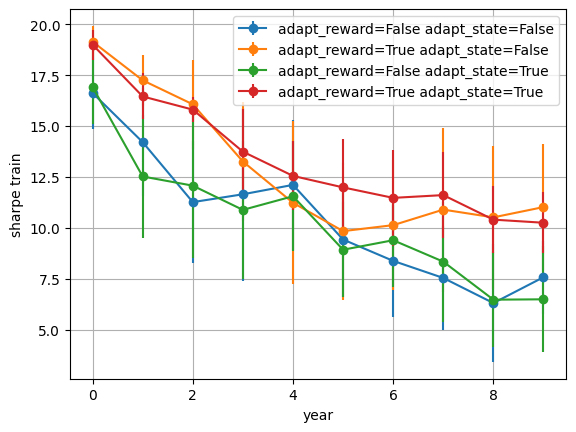

In [7]:
for adapt_reward, adapt_state in options_list:
    max_idx = min([len(ar) for ar in sharpes_all_train[(adapt_reward, adapt_state)]])
    cut_rel_sharpes_train = np.array([ar[:max_idx] for ar in sharpes_all_train[(adapt_reward, adapt_state)]])
    plt.errorbar(range(max_idx), np.mean(cut_rel_sharpes_train, axis=(0,2)), 
                 np.std(cut_rel_sharpes_train, axis=(0,2)), label=f"{adapt_reward=} {adapt_state=}",
                 marker='o')
plt.legend()
plt.grid()
plt.xlabel("year")
plt.ylabel("sharpe train")

Text(0, 0.5, 'sharpe eval')

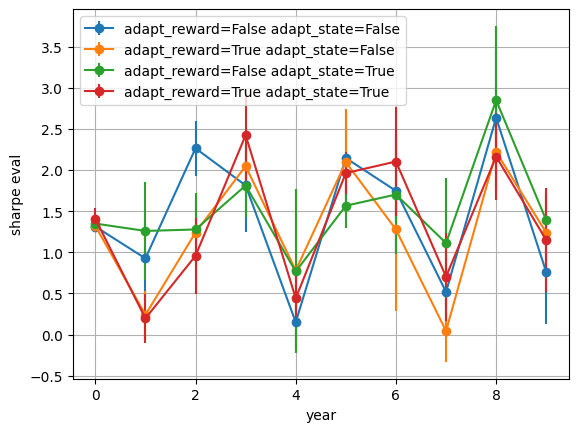

In [8]:
for adapt_reward, adapt_state in options_list:
    max_idx = min([len(ar) for ar in rel_sharpes_eval[(adapt_reward, adapt_state)]])
    cut_rel_sharpes_eval = np.array([ar[:max_idx] for ar in rel_sharpes_eval[(adapt_reward, adapt_state)]])
    plt.errorbar(range(max_idx), np.mean(cut_rel_sharpes_eval, axis=0), 
                 np.std(cut_rel_sharpes_eval, axis=0), label=f"{adapt_reward=} {adapt_state=}",
                 marker='o')
plt.legend()
plt.grid()
plt.xlabel("year")
plt.ylabel("sharpe eval")

Text(0, 0.5, 'sharpe test')

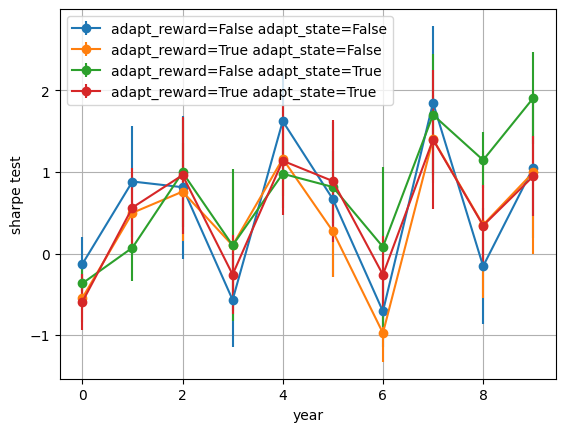

In [9]:
for adapt_reward, adapt_state in options_list:
    max_idx = min([len(ar) for ar in rel_sharpes_test[(adapt_reward, adapt_state)]])
    cut_rel_sharpes_test = np.array([ar[:max_idx] for ar in rel_sharpes_test[(adapt_reward, adapt_state)]])
    plt.errorbar(range(max_idx), np.mean(cut_rel_sharpes_test, axis=0), 
                 np.std(cut_rel_sharpes_test, axis=0), label=f"{adapt_reward=} {adapt_state=}",
                 marker='o')
plt.legend()
plt.grid()
plt.xlabel("year")
plt.ylabel("sharpe test")